# Moment-based approximation to the BID process

This is the exact generating function solution to the birth-immigration-death process.

In [1]:
genfunc (x, t, n0, kb, kd) := 
    ((kd * %e^(- (kb - kd) * t) - kd + 
        (kd - kb * %e^(- (kb - kd) * t)) * x) / 
        (kd * %e^(- (kb - kd) * t) - kb + 
        (kb - kb * %e^(- (kb - kd) * t)) * x))^n0;

(%o1) genfunc(x, t, n0, kb, kd) := 
                        (- (kb - kd)) t                   (- (kb - kd)) t
                   kd %e                - kd + (kd - kb %e               ) x n0
                  (---------------------------------------------------------)
                        (- (kb - kd)) t                   (- (kb - kd)) t
                   kd %e                - kb + (kb - kb %e               ) x

In [11]:
probdist (m, t, n0, kb, kd) :=
block([gf],
    gf : genfunc(z, t, n0, kb, kd),
    makelist([j, subst (0, z, diff(gf, z, j) / (j!))],
        j, 0, m))$

The trial distribution.

In [7]:
trialdist : (c0 + c1*x + c2*x^2 + c3*x^3) * %e^(-k*x);

                           3       2                - k x
(%o7)                 (c3 x  + c2 x  + c1 x + c0) %e

The moments of the trial distribution.

In [8]:
m0 : -subst(0, x, integrate(trialdist, x));
m1 : -subst(0, x, integrate(x * trialdist, x));
m2 : -subst(0, x, integrate(x^2 * trialdist, x));
m3 : -subst(0, x, integrate(x^3 * trialdist, x));
m4 : -subst(0, x, integrate(x^4 * trialdist, x));

                             c0   c1   2 c2   6 c3
(%o8)                        -- + -- + ---- + ----
                             k     2     3      4
                                  k     k      k

                           c0   2 c1   6 c2   24 c3
(%o9)                      -- + ---- + ---- + -----
                            2     3      4      5
                           k     k      k      k

                         2 c0   6 c1   24 c2   120 c3
(%o10)                   ---- + ---- + ----- + ------
                           3      4      5        6
                          k      k      k        k

                        6 c0   24 c1   120 c2   720 c3
(%o11)                  ---- + ----- + ------ + ------
                          4      5        6        7
                         k      k        k        k

                       24 c0   120 c1   720 c2   5040 c3
(%o12)                 ----- + ------ + ------ + -------
                         5        6        7        8
                        k        k        k        k

In [23]:
simeqs: solve([m1 = v1, m2 = v2, m3 = v3, m4 = v4], [c0, c1, c2, c3])$

In [32]:
simeqs[1][1];
simeqs[1][2];
simeqs[1][3];
simeqs[1][4];

                         5           4          3          2
                     (- k  v4) + 15 k  v3 - 60 k  v2 + 60 k  v1
(%o32)          c0 = ------------------------------------------
                                         6

                          6           5          4          3
                      (- k  v4) + 14 k  v3 - 50 k  v2 + 40 k  v1
(%o33)         c1 = - ------------------------------------------
                                          4

                         7           6          5          4
                     (- k  v4) + 13 k  v3 - 42 k  v2 + 30 k  v1
(%o34)          c2 = ------------------------------------------
                                         12

                          8           7          6          5
                      (- k  v4) + 12 k  v3 - 36 k  v2 + 24 k  v1
(%o35)         c3 = - ------------------------------------------
                                         144

As an example, consider the parameters n0 = 3, t = 1, kb = 1.1, kd = 0.9

In [35]:
exdist : probdist(30, 1, 3, 1.1, 0.9)$

In [40]:
exdist[1];
exdist[2];
exdist[3];

(%o44)                     [0, 0.09067119098877184]

(%o45)                      [1, 0.1503654864396397]

(%o46)                      [2, 0.1656835449951194]

Compute the moments for the exact distribution.

In [43]:
numop(n, gf) := 
    if n=0 then gf
        else numop(n-1, z * diff(gf, z))$
mom(m, t, n0, kb, kd) := 
    factor(subst(1, z, numop(m, genfunc(z, t, n0, kb, kd))))$

In [44]:
psubst([kb = 1.1, kd = 0.9], mom(1, 1, 3, kb, kd));
psubst([kb = 1.1, kd = 0.9], mom(2, 1, 3, kb, kd));
psubst([kb = 1.1, kd = 0.9], mom(3, 1, 3, kb, kd));
psubst([kb = 1.1, kd = 0.9], mom(4, 1, 3, kb, kd));

(%o51)                         3.66420827448051

(%o52)                         21.53908046320445

(%o53)                         166.2201628868458

(%o54)                         1578.74199416697

In [45]:
sum(exdist[k][2], k, 1, 31);
sum((k - 1) * exdist[k][2], k, 1, 31);
sum((k - 1)^2 * exdist[k][2], k, 1, 31);
sum((k - 1)^3 * exdist[k][2], k, 1, 31);
sum((k - 1)^4 * exdist[k][2], k, 1, 31);

(%o55)                         0.999999008987924

(%o56)                         3.664176179760895

(%o57)                         21.53803780407596

(%o58)                         166.1861732620685

(%o59)                         1577.629734070915

Solve for the parameters.  We frist solve for the c's because those equations are linear.

In [47]:
csol : solve([m1 = 3.664, m2 = 21.54, m3 = 166.22, m4 = 1578.7], [c0, c1, c2, c3])$


rat: replaced -3.664 by -458/125 = -3.664

rat: replaced -21.54 by -1077/50 = -21.54

rat: replaced -166.22 by -8311/50 = -166.22

rat: replaced -1578.7 by -15787/10 = -1578.7


In [52]:
csol[1][1];
csol[1][2];
csol[1][3];
csol[1][4];

                             5           4          3          2
                      78935 k  - 124665 k  + 64620 k  - 10992 k
(%o67)         c0 = - ------------------------------------------
                                         300

                            6           5          4         3
                     78935 k  - 116354 k  + 53850 k  - 7328 k
(%o68)          c1 = -----------------------------------------
                                        200

                             7           6          5         4
                      78935 k  - 108043 k  + 45234 k  - 5496 k
(%o69)         c2 = - -----------------------------------------
                                         600

                            8           7           6          5
                    394675 k  - 498660 k  + 193860 k  - 21984 k
(%o70)         c3 = --------------------------------------------
                                       36000

We then solve a polynomial equation for k.

In [60]:
normer : factor(psubst(csol, m0) - 1);
allroots(normer);

                       4           3           2
               394675 k  - 664880 k  + 387720 k  - 87936 k + 6000
(%o79)       - --------------------------------------------------
                                      6000

(%o80) [k = 0.1182905815725801, k = 0.3312641131423235, 
k = 0.08129861135120636 %i + 0.6175359483922156, 
k = 0.6175359483922156 - 0.08129861135120636 %i]

In [59]:
ccsol : cons(k = 0.3313, subst(0.3313 , k, csol[1]));

(%o78) [k = 0.3313, c0 = 0.1449713066598004, c1 = 0.1112482952010575, 
                          c2 = - 0.0100714872419167, c3 = 2.062991279345664e-4]



Check the answer.

In [61]:
psubst(ccsol, [m0, m1, m2, m3, m4]);

(%o81) [0.999955479043132, 3.663999999999999, 21.54, 166.2200000000001, 
                                                             1578.700000000009]

Substitute the numerical values into the trial distrbution.

In [62]:
approxdist : psubst(ccsol, trialdist);

                              3                       2
(%o82) (2.062991279345664e-4 x  - 0.0100714872419167 x  + 0.1112482952010575 x
                                                                     - 0.3313 x
                                             + 0.1449713066598004) %e

Plot against the exact solution.

In [69]:
set_plot_option([svg_file, "maxplot-moment-gen.svg"])$

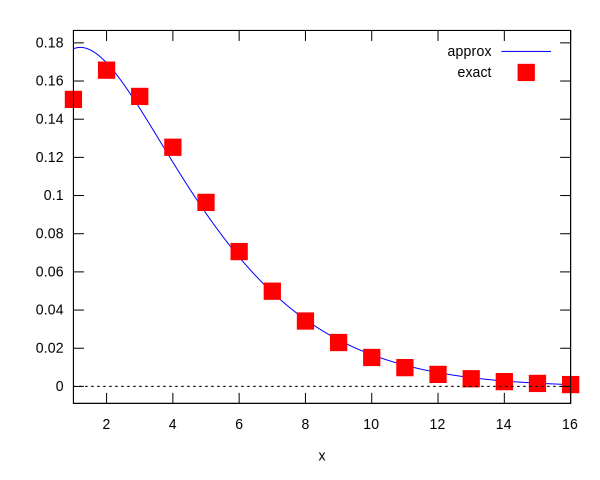

(%o90)       [/tmp/maxout66.gnuplot, /tmp/maxplot-moment-gen.svg]

In [70]:
plot2d([approxdist, [discrete, exdist]], [x, 1, 16],
[legend, "approx", "exact"], [style, lines, points]);